BZAN 542

Charles Liu

In [1]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Iris Example

In [2]:
str(iris)
x=iris$Petal.Length
y=iris$Petal.Width
c=iris$Species
table(c)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


c
    setosa versicolor  virginica 
        50         50         50 

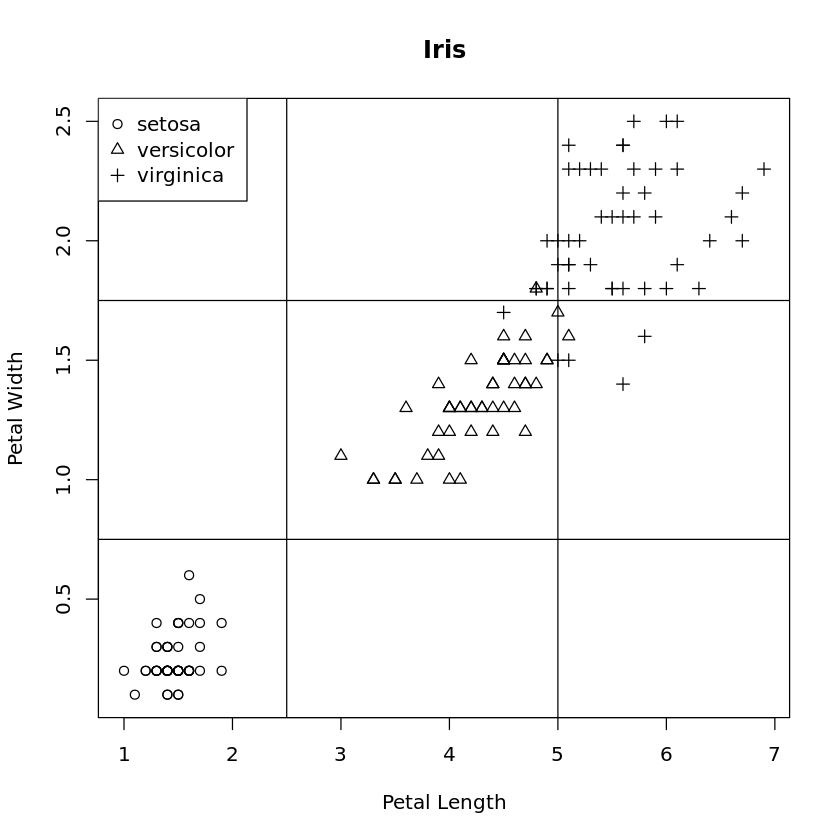

In [3]:
plot(x, y, pch=as.numeric(c), xlab='Petal Length', ylab='Petal Width', main ='Iris')
legend('topleft', pch=c(1,2,3), levels(c))
xlimits=c(2.5, 5)
ylimits=c(0.75, 1.75)
for (xlimit in xlimits) {
  abline(v=xlimit)
}
for (ylimit in ylimits) {
  abline(h=ylimit)
}

# Transformation

In [4]:
x1=character()
x1[x<=2.5]='low'
x1[2.5<x & x<=5]='medium'
x1[x>5]='high'
## these lines are equivalent of:
# x1=cut(x, c(-Inf, 2.5, 5, Inf), labels=c('low','medium','high'))

y1=character()
y1[y<=0.75]='low'
y1[0.75<y & y<=1.75]='medium'
y1[y>1.75]='high'
## these lines are equivalent of:
# y1=cut(y, c(-Inf, 0.75, 1.75, Inf), labels=c('low','medium','high'))

x2=cbind(x1=='low',x1=='medium',x1=='high')
y2=cbind(y1=='low',y1=='medium',y1=='high')
labels=c('low','medium','high')
colnames(x2)=colnames(y2)=labels
class(x2)='numeric'
class(y2)='numeric'
# these lines are equivalent of:
# x2=model.matrix(~0+x1)
# y2=model.matrix(~0+y1)

In [5]:
ind=sample(1:nrow(iris), 10, replace = FALSE)
cbind(x,x1,x2)[ind,]
cbind(y,y1,y2)[ind,]

x,x1,low,medium,high
3.3,medium,0,1,0
3.6,medium,0,1,0
4.5,medium,0,1,0
1.3,low,1,0,0
6.7,high,0,0,1
1.6,low,1,0,0
5.5,high,0,0,1
4.9,medium,0,1,0
5.7,high,0,0,1
5.2,high,0,0,1


y,y1,low,medium,high
1,medium,0,1,0
1.3,medium,0,1,0
1.5,medium,0,1,0
0.2,low,1,0,0
2.2,high,0,0,1
0.2,low,1,0,0
1.8,high,0,0,1
1.5,medium,0,1,0
2.1,high,0,0,1
2.3,high,0,0,1


In [6]:
# transformation with dplyr
iris = iris %>%
mutate(
    Petal.Length.Cut=cut(Petal.Length, c(-Inf, 2.5, 5, Inf), labels=labels)
    ,
    Petal.Width.Cut=cut(Petal.Width, c(-Inf, 0.75, 1.75, Inf), labels=labels)
)
iris[ind,]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Petal.Length.Cut,Petal.Width.Cut
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
94,5.0,2.3,3.3,1.0,versicolor,medium,medium
65,5.6,2.9,3.6,1.3,versicolor,medium,medium
85,5.4,3.0,4.5,1.5,versicolor,medium,medium
37,5.5,3.5,1.3,0.2,setosa,low,low
118,7.7,3.8,6.7,2.2,virginica,high,high
26,5.0,3.0,1.6,0.2,setosa,low,low
138,6.4,3.1,5.5,1.8,virginica,high,high
73,6.3,2.5,4.9,1.5,versicolor,medium,medium
125,6.7,3.3,5.7,2.1,virginica,high,high


In [7]:
model.matrix(~0+Petal.Length.Cut, data=iris)[ind,]

,Petal.Length.Cutlow,Petal.Length.Cutmedium,Petal.Length.Cuthigh
94,0,1,0
65,0,1,0
85,0,1,0
37,1,0,0
118,0,0,1
26,1,0,0
138,0,0,1
73,0,1,0
125,0,0,1
146,0,0,1


In [8]:
model.matrix(~0+Petal.Width.Cut, data=iris)[ind,]

,Petal.Width.Cutlow,Petal.Width.Cutmedium,Petal.Width.Cuthigh
94,0,1,0
65,0,1,0
85,0,1,0
37,1,0,0
118,0,0,1
26,1,0,0
138,0,0,1
73,0,1,0
125,0,0,1
146,0,0,1


# Distance

In [9]:
data=cbind(x=c(0,2,3,5),y=c(2,0,1,1))
data

x,y
0,2
2,0
3,1
5,1


In [10]:
dist(data, method="euclidean")
dist(data, method="manhattan")
dist(data, method="minkowski", p=1)
dist(data, method="minkowski", p=2)
dist(data, method="minkowski", p=20)
dist(data, method="minkowski", p=200)
dist(data, method="maximum")
dist(data, method="binary")

         1        2        3
2 2.828427                  
3 3.162278 1.414214         
4 5.099020 3.162278 2.000000

  1 2 3
2 4    
3 4 2  
4 6 4 2

  1 2 3
2 4    
3 4 2  
4 6 4 2

         1        2        3
2 2.828427                  
3 3.162278 1.414214         
4 5.099020 3.162278 2.000000

         1        2        3
2 2.070530                  
3 3.000000 1.035265         
4 5.000000 3.000000 2.000000

         1        2        3
2 2.006943                  
3 3.000000 1.003472         
4 5.000000 3.000000 2.000000

  1 2 3
2 2    
3 3 1  
4 5 3 2

    1   2   3
2 1.0        
3 0.5 0.5    
4 0.5 0.5 0.0

In [11]:
apply(data, 2, mean)
apply(data, 2, sd)
data=scale(data)
apply(data, 2, mean)
apply(data, 2, sd)
data
dist(data, method="euclidean")

x   y 
2.5 1.0

x         y 
2.0816660 0.8164966

x y 
0 0

x y 
1 1

x,y
-1.2009612,1.224745
-0.2401922,-1.224745
0.2401922,0.000000
1.2009612,0.000000


          1         2         3
2 2.6311741                    
3 1.8912755 1.3155870          
4 2.6961511 1.8912755 0.9607689

# PCA

In [12]:
food <- read.csv("protein.csv")
food
## correlation matrix
## we strip the first column (country labels)
cor(food[,-1])

Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0
Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4
E Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6
Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4
France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5


,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
RedMeat,1.00000000,0.1530027,0.58560895,0.5029311,0.06095745,-0.49987746,0.13542594,-0.3494486,-0.07422123
WhiteMeat,0.15300271,1.0000000,0.62040916,0.2814839,-0.23400923,-0.41379691,0.31377205,-0.6349618,-0.06131670
Eggs,0.58560895,0.6204092,1.00000000,0.5755331,0.06557136,-0.71243682,0.45223071,-0.5597810,-0.04551755
Milk,0.50293110,0.2814839,0.57553312,1.0000000,0.13788370,-0.59273662,0.22241118,-0.6210875,-0.40836414
Fish,0.06095745,-0.2340092,0.06557136,0.1378837,1.00000000,-0.52423080,0.40385286,-0.1471529,0.26613865
Cereals,-0.49987746,-0.4137969,-0.71243682,-0.5927366,-0.52423080,1.00000000,-0.53326231,0.6509973,0.04654808
Starch,0.13542594,0.3137721,0.45223071,0.2224112,0.40385286,-0.53326231,1.00000000,-0.4743116,0.08440956
Nuts,-0.34944855,-0.6349618,-0.55978097,-0.6210875,-0.14715294,0.65099727,-0.47431155,1.0000000,0.37496971
Fr.Veg,-0.07422123,-0.0613167,-0.04551755,-0.4083641,0.26613865,0.04654808,0.08440956,0.3749697,1.00000000


In [13]:
## scale = TRUE: variables are first standardized
pcafood <- prcomp(food[,-1], scale=TRUE)
pcafood

Standard deviations (1, .., p=9):
[1] 2.0016087 1.2786710 1.0620355 0.9770691 0.6810568 0.5702026 0.5211586
[8] 0.3410160 0.3148204

Rotation (n x k) = (9 x 9):
                 PC1         PC2         PC3          PC4         PC5
RedMeat   -0.3026094 -0.05625165 -0.29757957 -0.646476536  0.32216008
WhiteMeat -0.3105562 -0.23685334  0.62389724  0.036992271 -0.30016494
Eggs      -0.4266785 -0.03533576  0.18152828 -0.313163873  0.07911048
Milk      -0.3777273 -0.18458877 -0.38565773  0.003318279 -0.20041361
Fish      -0.1356499  0.64681970 -0.32127431  0.215955001 -0.29003065
Cereals    0.4377434 -0.23348508  0.09591750  0.006204117  0.23816783
Starch    -0.2972477  0.35282564  0.24297503  0.336684733  0.73597332
Nuts       0.4203344  0.14331056 -0.05438778 -0.330287545  0.15053689
Fr.Veg     0.1104199  0.53619004  0.40755612 -0.462055746 -0.23351666
                  PC6         PC7         PC8        PC9
RedMeat   -0.45986989  0.15033385 -0.01985770  0.2459995
WhiteMeat -0.12100707 -0.

In [14]:
foodpc <- predict(pcafood)
foodpc

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
3.4853673,-1.63047985,-1.76123326,-0.2296580,0.02325397,-1.03426476,-0.47174197,0.76155126,-0.10325325
-1.4226694,-1.04123130,1.33780391,-0.1680973,-0.93344658,0.21842810,-0.18115417,-0.25100249,-0.21744631
-1.6220323,0.15949557,0.21653445,-0.5207260,0.75509039,-0.28980510,-0.19559674,-0.20331176,-0.03317146
3.1340813,-1.30106563,0.15128956,-0.2141894,-0.48474537,-0.69557793,0.46478244,-0.80824466,-0.29986287
-0.3704646,-0.60266842,1.19594183,0.4639821,0.25682380,-0.82309047,0.31494841,0.01229809,-0.14944825
-2.3652688,0.28544582,-0.75226337,0.9673412,-0.75243310,-0.17032964,-0.22581590,-0.62102079,0.48027941
-1.4222108,0.45030085,1.30254017,1.1359613,0.42294279,-0.64831247,-0.55478278,-0.16317720,-0.25990129
-1.5638563,-0.59600255,-2.04950734,1.4153084,0.03720310,0.83420035,0.72623047,0.22591749,-0.13308980
-1.4879824,0.78536517,0.00188261,-1.9574576,0.25045870,-0.89894837,0.94647514,-0.02222005,0.54360773
2.2397000,1.00105887,-0.88260339,-1.7943200,-0.40497731,1.14447671,-0.14739068,-0.30583067,0.38796520


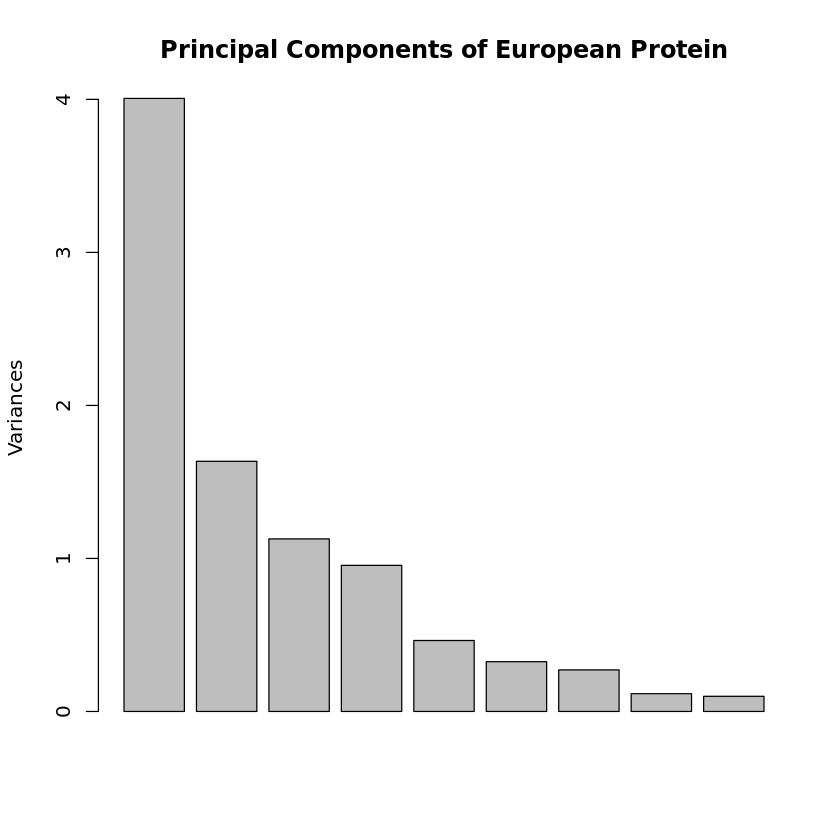

In [15]:
## how many principal components do we need?
plot(pcafood, main="Principal Components of European Protein")

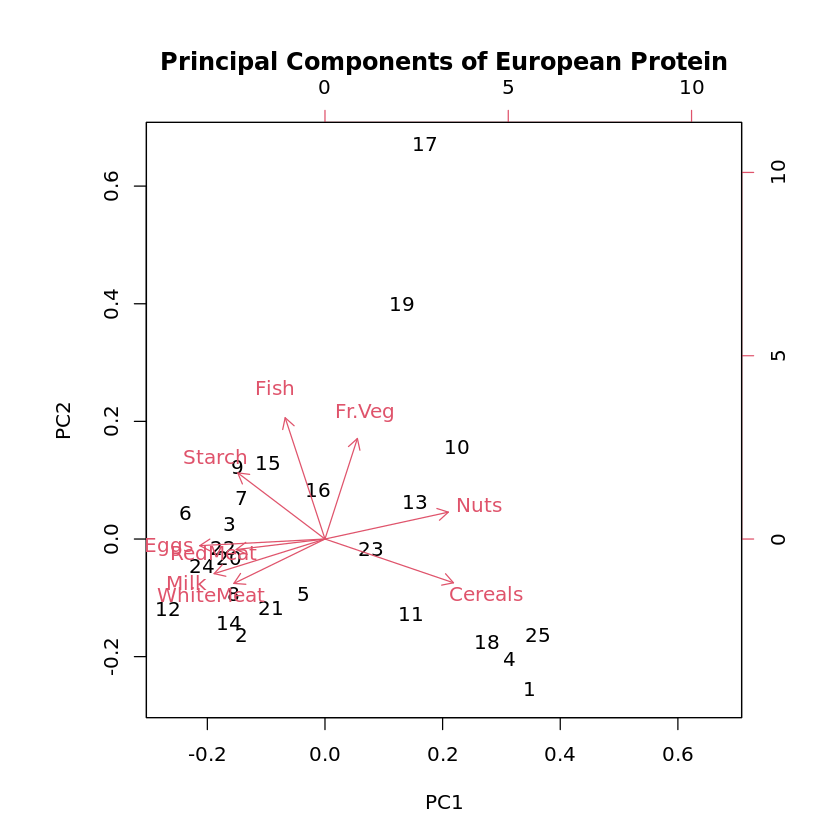

In [16]:
biplot(pcafood, main="Principal Components of European Protein")

## how do the PCs look?

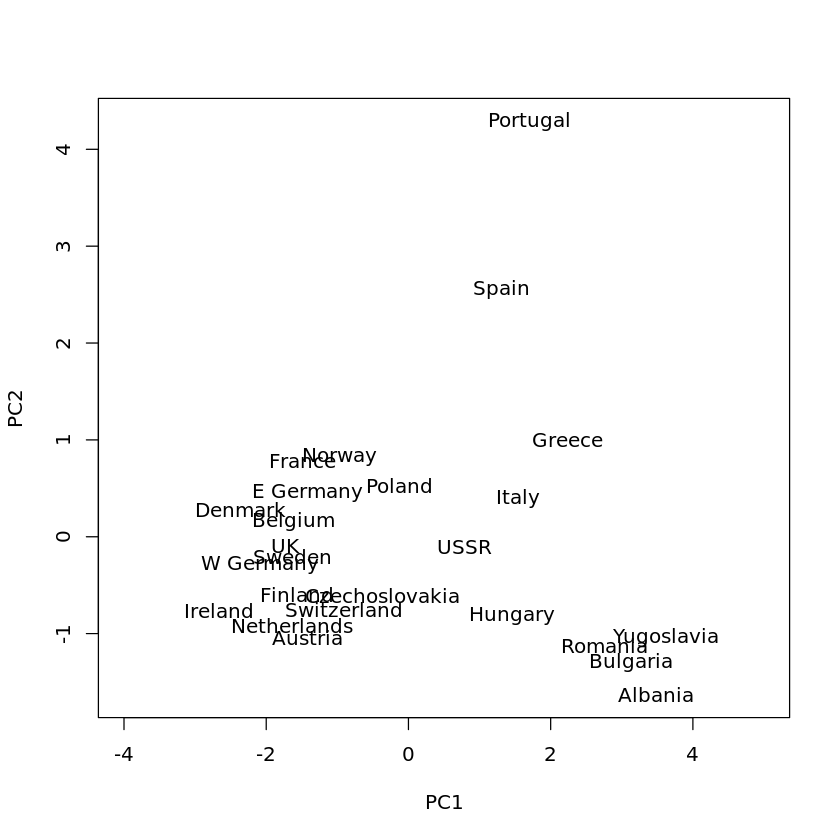

In [17]:
plot(foodpc[,1:2], type="n", xlim=c(-4,5))
text(x=foodpc[,1], y=foodpc[,2], labels=food$Country)

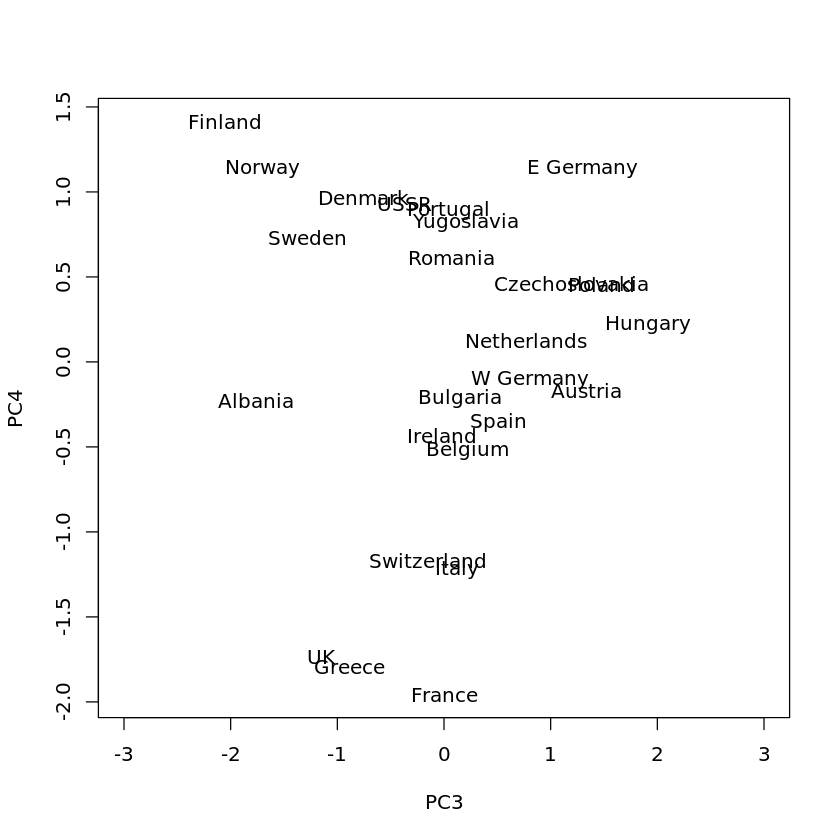

In [18]:
plot(foodpc[,3:4], type="n", xlim=c(-3,3))
text(x=foodpc[,3], y=foodpc[,4], labels=food$Country)

## how do the original variables look?

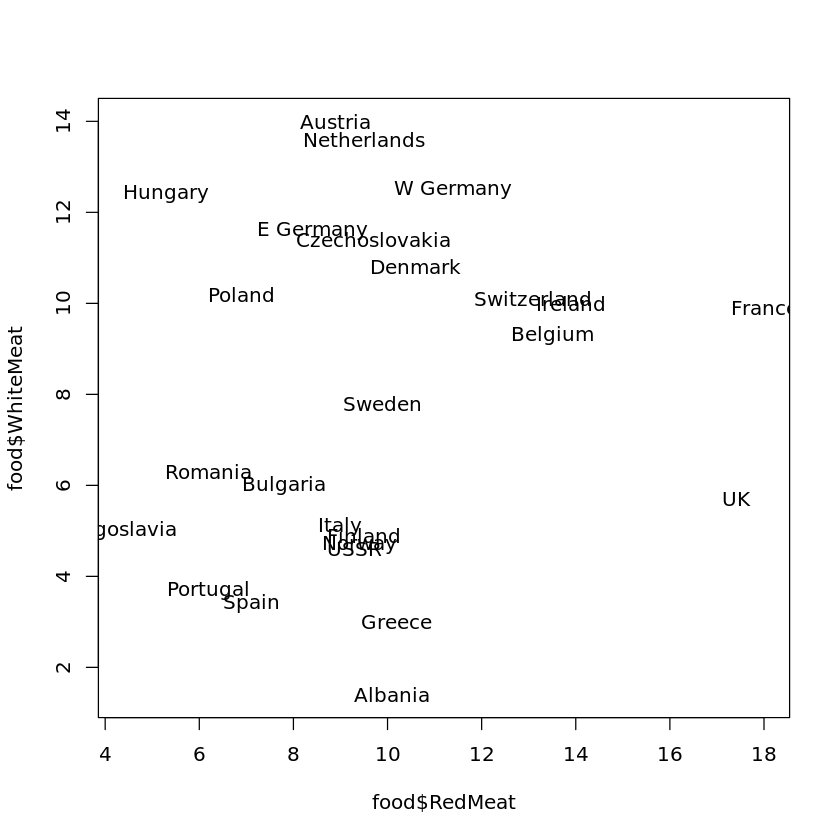

In [19]:
plot(food$RedMeat, y=food$WhiteMeat, type="n")
text(x=food$RedMeat, y=food$WhiteMeat, labels=food$Country)

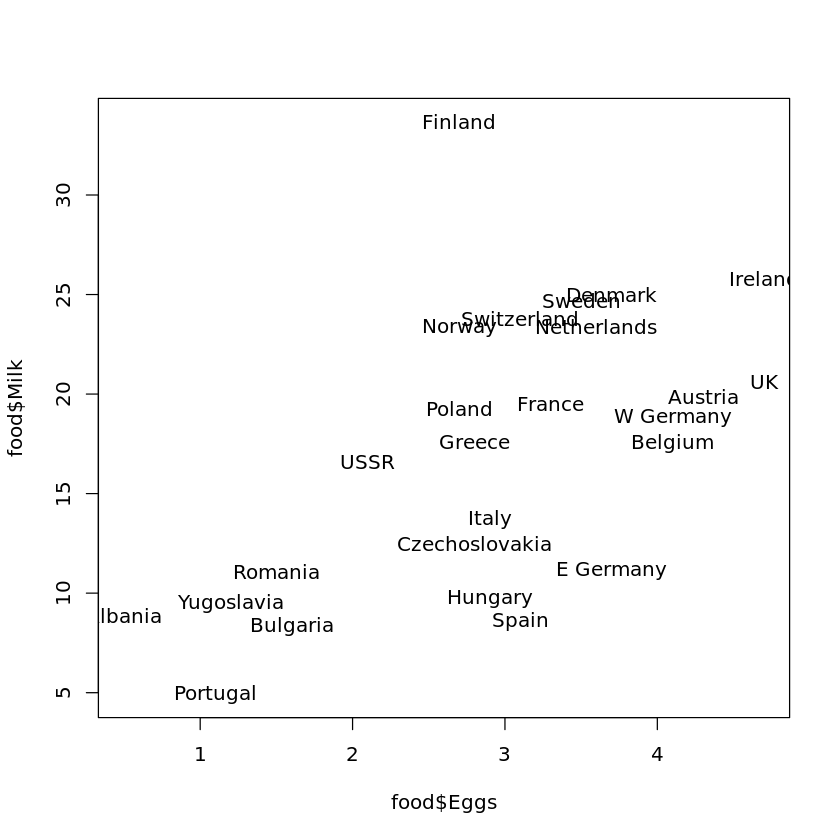

In [20]:
plot(food$Eggs, y=food$Milk, type="n")
text(x=food$Eggs, y=food$Milk, labels=food$Country)

# High Dimensional Distance

In [21]:
N <- 100
D_min <- c()
D_max <- c()
M_dim <- c(1, 2, 5, 10, 20, 50, 100, 200, 500, 1000)
for (M in M_dim){
    X <- matrix( rnorm(N*M), N, M )
    D <- dist(X)
    D_min <- append(D_min, min(D))
    D_max <- append(D_max, max(D))
}

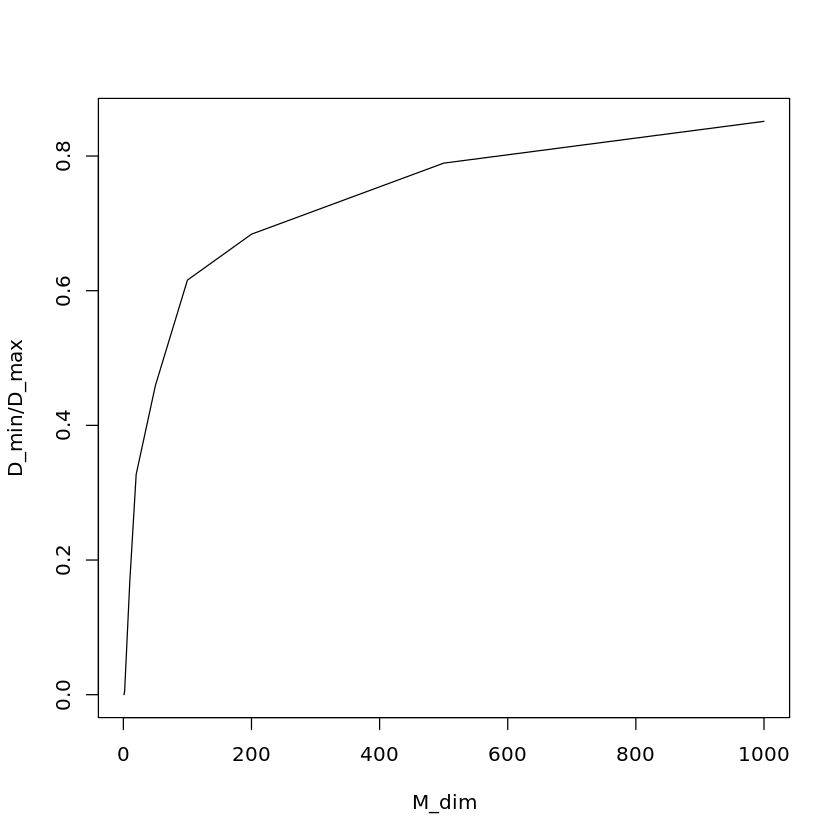

In [22]:
plot(M_dim, D_min/D_max, 'l')